In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /temp/, but they won't be saved outside of the current session

In [86]:
import numpy as np # linear algerbra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import json # data processing(.json)

from sklearn.preprocessing import LabelEncoder # Creates placeholders for categorical variables
from sklearn.feature_extraction.text import CountVectorizer # converts text into vector matrix
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.naive_bayes import MultinomialNB # ML model for naive bayes
from sklearn.metrics import accuracy_score, confusion_matrix # measure the accuracy of the model
from sklearn.metrics import classification_report # classification report of the model


In [87]:
import re # NLP
import nltk # natural langauge processing
from nltk.tokenize import word_tokenize # tokenizer
from nltk.stem import PorterStemmer # stemmer
from nltk.corpus import stopwords # stopwords

from wordcloud import WordCloud # create word cloud images of text

In [88]:
import tensorflow as tf # create neural networks
from tensorflow.keras import Sequential # create squential NN model
from tensorflow.keras.layers import Dense # implements the operation: output = activation(dot(input, kernel) + bias)
from tensorflow.keras.utils import plot_model # plot model architecture
from tensorflow.keras.callbacks import EarlyStopping # early stopping of training
from tensorflow.keras.models import load_model # load saved model



In [89]:
from sklearn.model_selection import GridSearchCV # hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV # hyperparameter optimization

In [90]:
!pip install tensorflow
!pip install keras


In [91]:
!pip install keras


In [92]:
%matplotlib inline

In [158]:
# read dataset which in .csv format

data = pd.read_csv('/content/halfdata.csv', encoding='utf-8').copy() # creates a dataframe of a copy of the dataset
                                                           # utf-8 encoding use to be able to read text in other langauge
print(data.shape)  # shape of the dataset
data.head(10)        # first 5 rows of the dataset

(10000, 2)


,Text,language
0,मराठीत दरवर्षी दोन हजार नवीन पुस्तके प्रकाशित...,Marathi
1,tropiskt regnskogsklimat råder i trakten årsme...,Swedish
2,on leaving colchester in the summer of wright...,English
3,é por tradição praça com características de pa...,Portugese
4,連邦議会名誉勲章を受章した人のヒスパニック系兵士のを栄誉を称える記念碑が、年にラレドに建てら...,Japanese
5,마르셀 라이히라니츠키marcel reich-ranicki 년 월 일 - 년 월 일는...,Korean
6,"\npackage main\n\nimport ""fmt""\n\nfunc main() ...",Go
7,att fara igenom staden i nord-sydlig riktning ...,Swedish
8,پ نوې کلمه که سملاسي مطلب ورسوي دا يې بل امتيا...,Pushto
9,"\npackage main\n\nimport ""fmt""\n\nfunc main() ...",Go


In [94]:
data.isnull().sum() # check for missing values

Text        7
language    0
dtype: int64

In [95]:

data.dropna(inplace=True) # drop missing values

In [96]:
data.shape

(9993, 2)

In [97]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [98]:
data.tail() # last 5 rows of the dataset

,Text,language
9995,اس کا مشاہدہ آسمانِ شمال اول میں کیا جا سکتا ہ...,Urdu
9996,"\npackage main\n\nimport ""fmt""\n\nfunc main() ...",Go
9997,diyarbakır kültür sanat vakfı dksv diyarbakırd...,Turkish
9998,ต่อมาในปีพศ โรงเรียนได้โอนจากกองการ ประถมศึกษ...,Thai
9999,järnvägen mellan lund - malmö öppnades den de...,Swedish


In [99]:

# categories in our target variable

data['language'].unique()

array(['Marathi', 'Swedish', 'English', 'Portugese', 'Japanese', 'Korean',
       'Go', 'Pushto', 'Tamil', 'Estonian', 'Russian', 'Urdu', 'Hindi',
       'Arabic', 'Dutch', 'Chinese', 'Python', 'Persian', 'Thai',
       'JavaScript', 'Latin', 'C#', 'C++', 'French', 'Spanish', 'Ruby',
       'Turkish', 'Java', 'Romanian', 'Indonesian', 'Assamese', 'Swift',
       'Telugu', 'Rust', 'Nepali', 'PHP', 'Sanskrit', 'Konkani',
       'Punjabi', 'Bengali', 'Kashmiri', 'Odia', 'Gujarati', 'Kannada',
       'Malayalam'], dtype=object)

In [100]:
# checking for null values

data.isnull().sum()

Text        0
language    0
dtype: int64

In [101]:
# checking the datatype of the features

data.dtypes

Text        object
language    object
dtype: object

In [102]:
# number of of samples per language (category)

data['language'].value_counts()

language
English       385
Tamil         380
Hindi         376
Urdu          374
Pushto        373
Japanese      372
Estonian      363
Romanian      357
Portugese     356
Russian       352
Turkish       351
Chinese       346
Dutch         346
Indonesian    346
Latin         344
Persian       344
Swedish       343
Arabic        342
French        335
Korean        331
Thai          331
Spanish       326
Go            193
Ruby          183
C#            182
Java          178
C++           177
Rust          174
JavaScript    172
PHP           170
Python        170
Swift         162
Malayalam      43
Gujarati       38
Odia           38
Marathi        37
Konkani        37
Kashmiri       37
Bengali        36
Nepali         35
Kannada        34
Assamese       33
Punjabi        33
Sanskrit       31
Telugu         27
Name: count, dtype: int64

In [103]:
# using LabelEncoder to get placeholder number values for categorical variabel 'language'

le = LabelEncoder()
data['language_encoded'] = le.fit_transform(data['language'])
data.head()

,Text,language,language_encoded
0,मराठीत दरवर्षी दोन हजार नवीन पुस्तके प्रकाशित...,Marathi,23
1,tropiskt regnskogsklimat råder i trakten årsme...,Swedish,38
2,on leaving colchester in the summer of wright...,English,7
3,é por tradição praça com características de pa...,Portugese,28
4,連邦議会名誉勲章を受章した人のヒスパニック系兵士のを栄誉を称える記念碑が、年にラレドに建てら...,Japanese,14


In [104]:
# list of languages encoded with thier respective indices representing their placeholder numbers

lang_list = [i for i in range(45)]
lang_list = le.inverse_transform(lang_list)
lang_list = lang_list.tolist()
lang_list

['Arabic',
 'Assamese',
 'Bengali',
 'C#',
 'C++',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Go',
 'Gujarati',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Java',
 'JavaScript',
 'Kannada',
 'Kashmiri',
 'Konkani',
 'Korean',
 'Latin',
 'Malayalam',
 'Marathi',
 'Nepali',
 'Odia',
 'PHP',
 'Persian',
 'Portugese',
 'Punjabi',
 'Pushto',
 'Python',
 'Romanian',
 'Ruby',
 'Russian',
 'Rust',
 'Sanskrit',
 'Spanish',
 'Swedish',
 'Swift',
 'Tamil',
 'Telugu',
 'Thai',
 'Turkish',
 'Urdu']

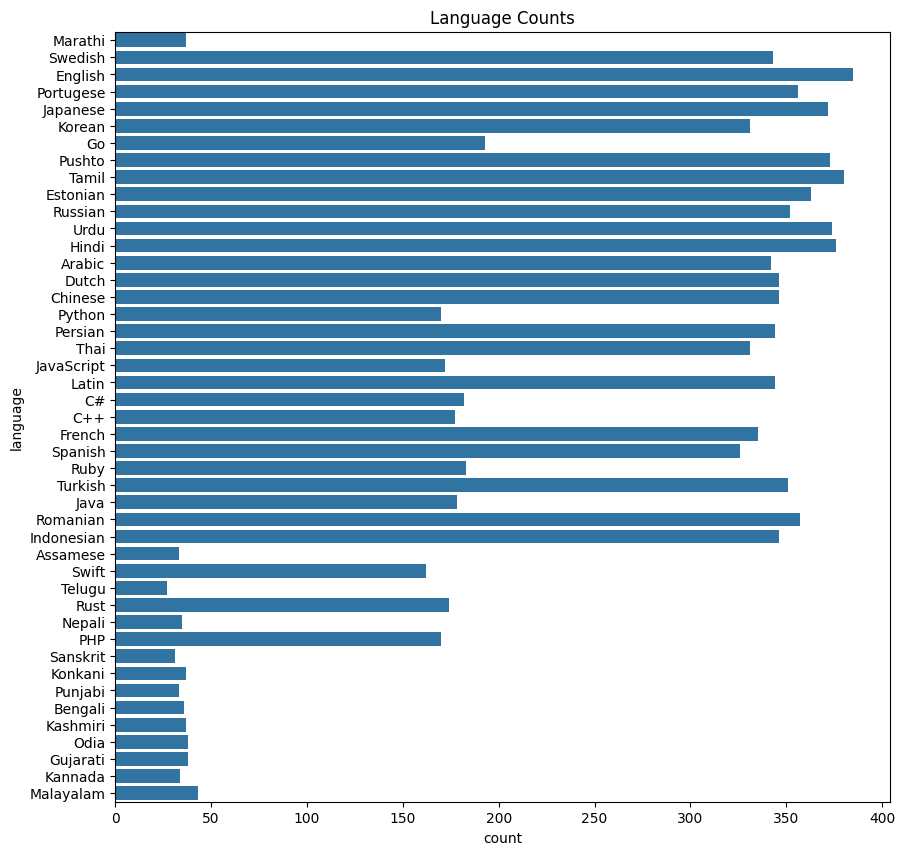

In [105]:
# plotting a language-wise freqeuncy distribtion for number of samples in each language

plt.figure(figsize=(10,10))
plt.title('Language Counts')
ax = sns.countplot(y=data['language'], data=data)
plt.show()

In [106]:
def remove_english(text):
    """
    function that takes text as input and returns text without english words
    """
    pat = "[a-zA-Z]+"
    text = re.sub(pat, "", text)
    return text

In [107]:
data_Chinese = data[data['language']=='Chinese'] # Chinese data in dataset

Text = data.loc[data.language=='Chinese']['Text']
Text = Text.apply(remove_english) # removing english words

data_Chinese.loc[:,'Text'] = Text

In [108]:
import pandas as pd

# Assuming data_Chinese is a DataFrame containing cleaned Chinese text

# Drop rows with Chinese language
data.drop(data[data['language'] == 'Chinese'].index, inplace=True)

# Concatenate data and data_Chinese
data = pd.concat([data, data_Chinese], ignore_index=True)


In [109]:
# shuffling dataframe and resetting index

data =data.sample(frac=1).reset_index(drop=True)

In [110]:
# defining input variable
# vectorizing input varible 'clean_text' into a matrix

x = data['Text']

cv = CountVectorizer() # ngram_range=(1,2)
x = cv.fit_transform(x)

# changing the datatype of the number into uint8 to consume less memory
x = x.astype('uint8') # uint8 and float32

In [111]:
# defining target variable

y = data['language_encoded']

In [159]:
# shuffling dataframe and resetting index

data =data.sample(frac=1).reset_index(drop=True)

In [112]:
# splitting data into training and testing datasets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [113]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Step 1: Load and preprocess dataset
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Step 2: Load dataset
from sklearn.preprocessing import LabelEncoder

# Step 2: Load dataset
df = pd.read_csv("/content/halfdata.csv")
texts = df['Text'].tolist()
labels = df['language'].tolist()

# Step 3: Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Step 4: Tokenization and Data Loading
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
max_len = 128

# Step 5: Define RoBERTa Model for Classification
model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=len(set(labels)),
    output_attentions=False,
    output_hidden_states=False
)

# Rest of the code remains the same...


# Step 5: Training
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

train_dataset = CustomDataset(train_texts, train_labels, tokenizer, max_len)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer, max_len)

batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch in tqdm(train_dataloader, desc="Training"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Validation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            val_loss += loss.item()

            _, predicted = torch.max(outputs.logits, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(val_dataloader)
    accuracy = correct / total

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {accuracy:.4f}")

# Step 6: Evaluation (Optional)
# Evaluate the model on a separate test dataset if available.


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Validation: 100%|██████████| 125/125 [00:17<00:00,  7.01it/s]


Epoch 1/3, Train Loss: 0.8333, Val Loss: 0.1809, Val Acc: 0.9730


Validation: 100%|██████████| 125/125 [00:16<00:00,  7.44it/s]


Epoch 2/3, Train Loss: 0.1880, Val Loss: 0.1240, Val Acc: 0.9730


Validation: 100%|██████████| 125/125 [00:16<00:00,  7.45it/s]

Epoch 3/3, Train Loss: 0.1194, Val Loss: 0.1034, Val Acc: 0.9730


In [161]:
# Example input text for testing
input_text = "This is a sample text for testing."

In [166]:
# Tokenize input text
inputs = tokenizer(input_text, return_tensors="pt", max_length=max_len, truncation=True, padding=True)

# Move input tensors to device
input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)

# Perform inference
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

# Get predicted label
predicted_label = torch.argmax(outputs, dim=1).item()

# Decode predicted label using label encoder
predicted_language = label_encoder.inverse_transform([predicted_label])[0]

print("Input Text:", input_text)
print("Predicted Language:", predicted_language)


ValueError: The first argument to `Layer.call` must always be passed.

In [114]:
# fitting the Multinomial Naive Bayes model

NB_model = MultinomialNB()
NB_model.fit(x_train, y_train)

MultinomialNB()

In [115]:
# predicting using the naive bayes model

y_pred = NB_model.predict(x_test)

In [116]:
# accuracy of the naive bayes model

accuracy_score(y_test, y_pred)

0.9419709854927464

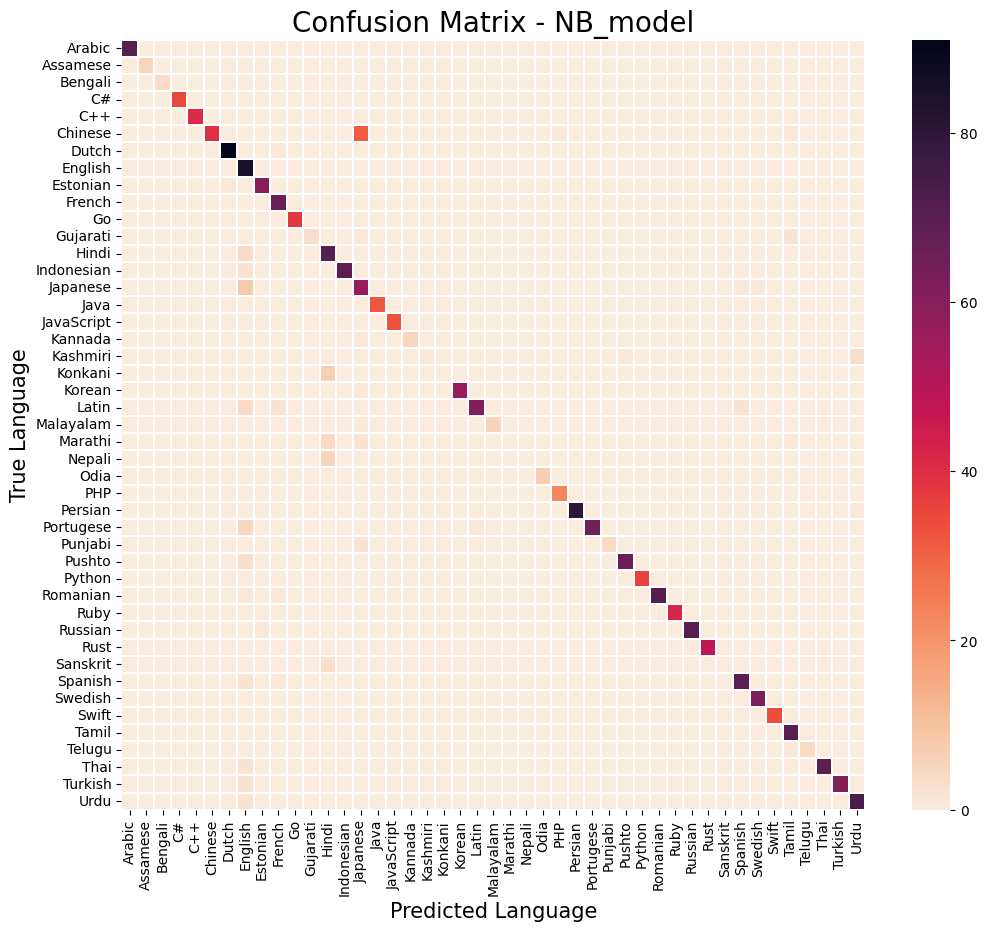

In [117]:
# creating confusion matrix heatmap

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - NB_model', fontsize=20)
sns.heatmap(cm, xticklabels=lang_list, yticklabels=lang_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        41
           5       1.00      0.55      0.71        73
           6       0.99      0.99      0.99        92
           7       0.71      1.00      0.83        85
           8       0.98      0.98      0.98        61
           9       0.93      1.00      0.96        66
          10       1.00      1.00      1.00        38
          11       1.00      0.50      0.67         6
          12       0.79      0.95      0.86        75
          13       1.00      0.97      0.99        71
          14       0.59      0.85      0.70        66
          15       1.00      1.00      1.00        32
          16       1.00      1.00      1.00        33
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creating a Multilayer Perceptron model¶
Tensorflow does not take sparse matrices as input and hence we have to convert our sparse matrix into an array. This requires alot of memory and hence uit8 data type helps.

In [119]:
# converting csr matrix into np.ndarray supported by tensorflow

x_train = x_train.toarray()
x_test = x_test.toarray()

In [120]:
# shapes of the various datasets

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7994, 131132) (1999, 131132) (7994,) (1999,)


In [121]:
# input size hyperparameter

INPUT_SIZE = x_train.shape[1]
INPUT_SIZE

131132

In [122]:
# outputsize hyperparatmeter

OUTPUT_SIZE = len(data['language_encoded'].unique())
OUTPUT_SIZE

45

EPOCHS indicates the number of passes of the entire training dataset the machine learning algorithm has completed.

We divide the dataset into batches of BATCH_SIZE for ease of computation.

In [123]:
# epochs and batch_size hyperparameters

EPOCHS = 10
BATCH_SIZE = 128

We create a Sequential model with activation function as Rectified Linear Unit(ReLU) and intializer as HE Normal as it works well with ReLU.

Our Neural Network is 5 layers deep and 261254 layers wide.

It contains 3 hidden layers:

Hidden Layer 1 : 100 nodes
Hidden Layer 2 : 80 nodes
Hidden Layer 3 : 50 nodes
The output layer uses the Soft Max activation function which returns an array of lenght 22 contianing probablity of an element's index being the output.

In [124]:
# creating the MLP model

model = Sequential([
    Dense(100, activation='relu', kernel_initializer='he_normal', input_shape=(INPUT_SIZE,)),
    Dense(80, activation='relu', kernel_initializer='he_normal'),
    Dense(50, activation='relu', kernel_initializer='he_normal'),
    Dense(OUTPUT_SIZE, activation='softmax')
])

We use the Adaptive Moment Estimation (Adam) algorithm for optimization as it is good with sparse data. We use Sparse Categorical Crossentropy as the loss/objective function as it performs well for muliclassification problems.

In [125]:
# compiling the MLP model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [126]:
# fitting the MLP model

hist = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.3, verbose=2)

Epoch 1/10
44/44 - 3s - loss: 2.4354 - accuracy: 0.5576 - val_loss: 1.0394 - val_accuracy: 0.8545 - 3s/epoch - 75ms/step
Epoch 2/10
44/44 - 1s - loss: 0.4841 - accuracy: 0.9264 - val_loss: 0.5141 - val_accuracy: 0.9004 - 980ms/epoch - 22ms/step
Epoch 3/10
44/44 - 1s - loss: 0.1630 - accuracy: 0.9684 - val_loss: 0.3993 - val_accuracy: 0.9300 - 868ms/epoch - 20ms/step
Epoch 4/10
44/44 - 1s - loss: 0.0642 - accuracy: 0.9948 - val_loss: 0.3874 - val_accuracy: 0.9441 - 843ms/epoch - 19ms/step
Epoch 5/10
44/44 - 1s - loss: 0.0324 - accuracy: 0.9970 - val_loss: 0.3668 - val_accuracy: 0.9483 - 851ms/epoch - 19ms/step
Epoch 6/10
44/44 - 1s - loss: 0.0217 - accuracy: 0.9975 - val_loss: 0.3725 - val_accuracy: 0.9321 - 841ms/epoch - 19ms/step
Epoch 7/10
44/44 - 1s - loss: 0.0166 - accuracy: 0.9977 - val_loss: 0.3589 - val_accuracy: 0.9316 - 855ms/epoch - 19ms/step
Epoch 8/10
44/44 - 1s - loss: 0.0135 - accuracy: 0.9984 - val_loss: 0.3766 - val_accuracy: 0.9221 - 951ms/epoch - 22ms/step
Epoch 9/10


In [127]:
# summary of the MLP model

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               13113300  
                                                                 
 dense_9 (Dense)             (None, 80)                8080      
                                                                 
 dense_10 (Dense)            (None, 50)                4050      
                                                                 
 dense_11 (Dense)            (None, 45)                2295      
                                                                 
Total params: 13127725 (50.08 MB)
Trainable params: 13127725 (50.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Our model is a 5 layer Neural Network with the following architecture.

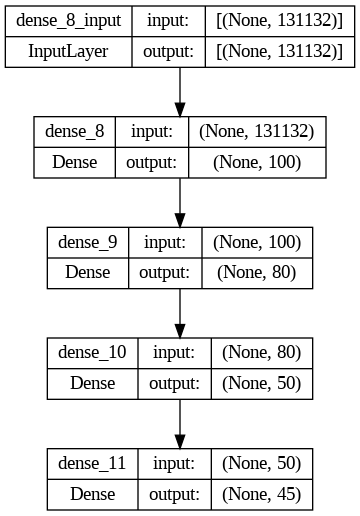

In [128]:
# architetcure of the MLP model

plot_model(model, show_shapes=True)

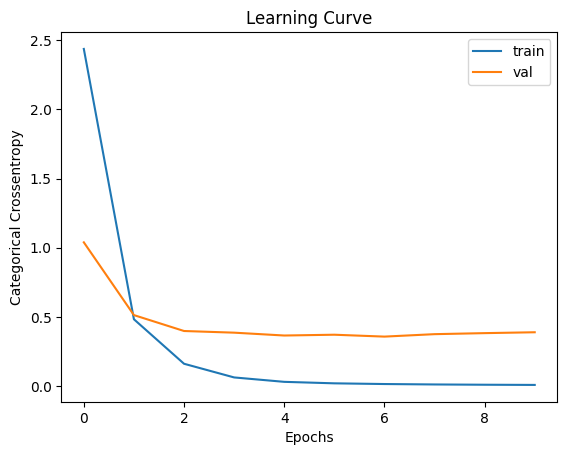

In [129]:
# creating loss vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

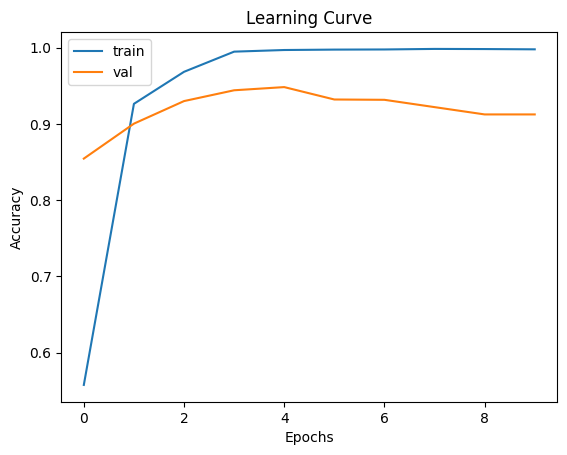

In [130]:
# creating accuracy vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [131]:
# evaluating the loss and accuracy of the model

loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy %.3f'%accuracy)

63/63 - 0s - loss: 0.3638 - accuracy: 0.9230 - 322ms/epoch - 5ms/step
Accuracy 0.923


Creating the optimized model¶
We re-transform the data to obtain the entire dataset.

In [132]:
# defining input variable
# vectorizing input varible 'clean_text' into a matrix

x = data['Text']

cv = CountVectorizer() # ngram_range=(1,2)
x = cv.fit_transform(x)

# changing the datatype of the number into uint8 to consume less memory
x = x.astype('uint8') # uint8 and float32

In [133]:
# defining target variable

y = data['language_encoded']

In [134]:

# splitting data into training and testing datasets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [135]:
# converting csr matrix into np.ndarray supported by tensorflow

x_train = x_train.toarray()
x_test = x_test.toarray()

In [136]:
# shapes of the various datasets

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7994, 131132) (1999, 131132) (7994,) (1999,)


We create an optimized model using the hyperparameters found in Grid Search and Randomized Search.

In [137]:
# input size hyperparameter

INPUT_SIZE = x_train.shape[1]
INPUT_SIZE

# outputsize hyperparatmeter

OUTPUT_SIZE = len(data['language_encoded'].unique())
OUTPUT_SIZE

45

In [138]:
BATCH_SIZE = 256
EPOCHS = 8

We configure early stopping to avoid overfitting.

In [139]:
# configuring early stopping

es = EarlyStopping(monitor='accuracy', patience=1)

We create a Sequential model with activation function as softsign and intializer as glorot_uniform. Our Neural Network is 5 layers deep and 261254 layers wide.

It contains 3 hidden layers:

Hidden Layer 1 : 100 nodes
Hidden Layer 2 : 80 nodes
Hidden Layer 3 : 50 nodes
The output layer uses the Soft Max activation function which returns an array of lenght 22 contianing probablity of an element's index being the output.

In [140]:
# creating the MLP model

model = Sequential([
    Dense(100, activation='softsign', kernel_initializer='glorot_uniform', input_shape=(INPUT_SIZE,)),
    Dense(80, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(50, activation='softsign', kernel_initializer='glorot_uniform'),
    Dense(OUTPUT_SIZE, activation='softmax')
])

We use the Adaptive Moment Estimation (Adam) algorithm for optimization as it is good with sparse data. We use Sparse Categorical Crossentropy as the loss/objective function as it performs well for muliclassification problems.

In [141]:
# compiling the MLP model

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

We split 30% of the training data into validation data to check if the model is overfitting

In [142]:

# fitting the model with earlystopping callback to avoid overfitting

hist = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.3, callbacks=[es], verbose=2)

Epoch 1/8
22/22 - 6s - loss: 3.0674 - accuracy: 0.7984 - val_loss: 2.4368 - val_accuracy: 0.9033 - 6s/epoch - 257ms/step
Epoch 2/8
22/22 - 1s - loss: 1.8906 - accuracy: 0.9541 - val_loss: 1.5938 - val_accuracy: 0.9166 - 1s/epoch - 48ms/step
Epoch 3/8
22/22 - 1s - loss: 1.1315 - accuracy: 0.9587 - val_loss: 1.0317 - val_accuracy: 0.9291 - 1s/epoch - 46ms/step
Epoch 4/8
22/22 - 1s - loss: 0.6702 - accuracy: 0.9710 - val_loss: 0.7097 - val_accuracy: 0.9379 - 1s/epoch - 46ms/step
Epoch 5/8
22/22 - 1s - loss: 0.4223 - accuracy: 0.9821 - val_loss: 0.5367 - val_accuracy: 0.9433 - 1s/epoch - 46ms/step
Epoch 6/8
22/22 - 1s - loss: 0.2927 - accuracy: 0.9900 - val_loss: 0.4415 - val_accuracy: 0.9479 - 1s/epoch - 47ms/step
Epoch 7/8
22/22 - 1s - loss: 0.2175 - accuracy: 0.9939 - val_loss: 0.3837 - val_accuracy: 0.9537 - 1s/epoch - 47ms/step
Epoch 8/8
22/22 - 1s - loss: 0.1683 - accuracy: 0.9959 - val_loss: 0.3459 - val_accuracy: 0.9579 - 937ms/epoch - 43ms/step


In [143]:
# summary of the MLP model

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               13113300  
                                                                 
 dense_13 (Dense)            (None, 80)                8080      
                                                                 
 dense_14 (Dense)            (None, 50)                4050      
                                                                 
 dense_15 (Dense)            (None, 45)                2295      
                                                                 
Total params: 13127725 (50.08 MB)
Trainable params: 13127725 (50.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Our model is a 5 layer Neural Network with the following architecture.

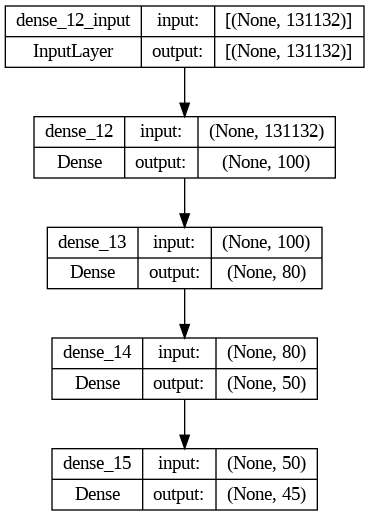

In [144]:
# architetcure of the MLP model

plot_model(model, show_shapes=True)

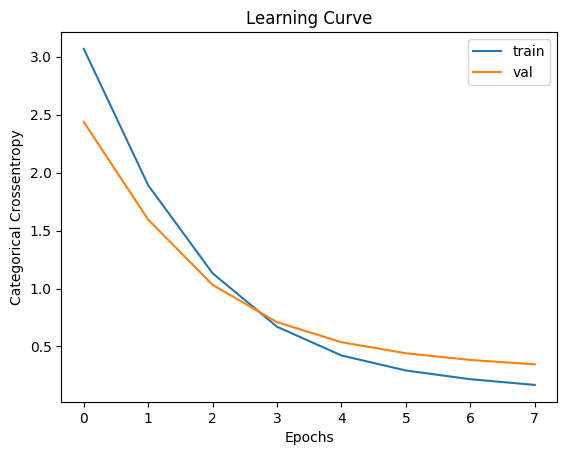

In [145]:
# creating loss vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()


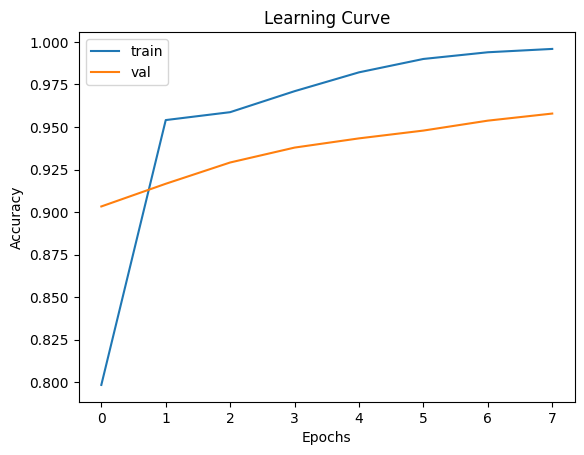

In [146]:
# creating accuracy vs epochs plot

plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [147]:
# evaluating the loss and accuracy of the model

loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print('Accuracy %.3f'%accuracy)

63/63 - 0s - loss: 0.3915 - accuracy: 0.9510 - 235ms/epoch - 4ms/step
Accuracy 0.951


Our model MLP obtains an accuracy of 95% which beats are MultinomialNB model (95%).

63/63 [==============================] - 0s 3ms/step


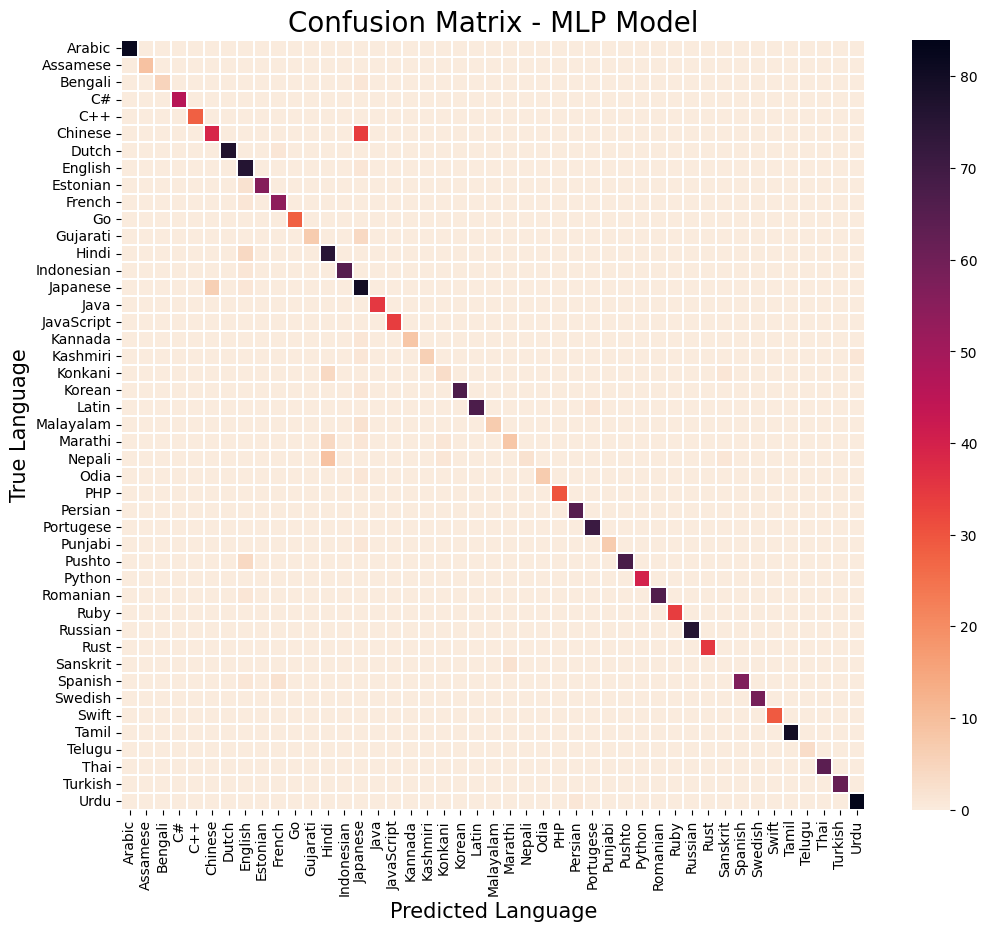

In [148]:
y_pred_prob = model.predict(x_test) # returns an array containing probability for each category being output
y_pred = []
for i in y_pred_prob:
    out = np.argmax(i) # taking the highest probability category as output
    y_pred.append(out)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_test, y_pred) # confusion matrix

# heat map of confusion matrix
plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - MLP Model', fontsize=20)
sns.heatmap(cm, xticklabels=lang_list, yticklabels=lang_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00         9
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00        46
           4       1.00      1.00      1.00        28
           5       0.87      0.53      0.66        73
           6       1.00      0.99      0.99        78
           7       0.84      0.99      0.90        77
           8       1.00      0.97      0.98        58
           9       0.95      0.98      0.96        55
          10       1.00      1.00      1.00        28
          11       1.00      0.64      0.78        11
          12       0.82      0.95      0.88        79
          13       1.00      0.98      0.99        66
          14       0.62      0.92      0.74        87
          15       1.00      1.00      1.00        35
          16       1.00      1.00      1.00        34
          17       1.00    

In [150]:
# saving the model

model.save('language_identifcation_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Predicting using the model¶
We load the model and deploy it to predict the language of unknown text.

Predicting using the model
We load the model and deploy it to predict the language of unknown text.

In [151]:
# loading the model

model = load_model('language_identifcation_model.h5')

In [152]:
# using the model for prediction

sent = """print(5),def function_name(argument1, argument2):
    # Function body
    result = argument1 + argument2
    return result

# Define main code
def main():
    # Main code body
    variable1 = 10
    variable2 = 20
    result = function_name(variable1, variable2)
    print("Result:", result)

# Check if the script is being run directly
if __name__ == "__main__":
    # Call the main function
    main()"""


sent = cv.transform([sent])
ans = model.predict(sent)
ans = np.argmax(ans)
le.inverse_transform([ans])

1/1 [==============================] - 0s 96ms/step


array(['Python'], dtype=object)

In [157]:
# using the model for prediction

sent = """संस्कृत भाषा वेदों, उपनिषदां, ग्रंथेषु चारक, भगवद्गीता, रामायणं, महाभारतं च सर्वेषामपि अध्ययने उत्तमा संस्कृत भाषा आसीत्। संस्कृत व्याकरणेन विख्याता आसीत्, अस्मिन् भाषायां सुन्दरः वाक्यानि सज्जन्ति। तस्यां अनेके श्लोकाः, सूत्राणि च लिखिताः आसन्। भारतस्य प्राचीना भाषासु संस्कृतं प्रधानं स्थानमासीत्। संस्कृतभाषायां वेदाः प्रायेणाधिका अध्ययनाय प्रेरिताः आसन्। भारतस्य संस्कृते प्रचारः आसीत्, विद्याभ्यासे तथा साहित्ये अत्यन्तम् उत्तमा भाषा आसीत्। अतः संस्कृतभाषायाम् अध्ययनं कुर्वन्तः ज्ञानस्य अपारं प्राप्नुवन्ति।



"""


sent = cv.transform([sent])
ans = model.predict(sent)
ans = np.argmax(ans)
le.inverse_transform([ans])

1/1 [==============================] - 0s 11ms/step


array(['Hindi'], dtype=object)

In [154]:
# using the model for prediction

sent = """こちらの依頼を頂き、日本語の段落を作成いたします。以下に、約100単語の文章をご提供いたします。

東京の夜は、多様性と活気に満ちています。煌びやかなネオンライトが都市の景色を彩り、人々は繁華街を歩き回ります。飲食店では、新鮮な寿司や焼き鳥、ラーメンなど、さまざまな美味しい料理が提供されています。また、古き良き伝統も息づいており、神社やお寺での静かな祈りの場面も見られます。東京は、現代と伝統が見事に融合した都市であり、その魅力は日々新たな発見を約束しています。"""


sent = cv.transform([sent])
ans = model.predict(sent)
ans = np.argmax(ans)
le.inverse_transform([ans])

1/1 [==============================] - 0s 8ms/step


array(['Japanese'], dtype=object)

In [156]:
# using the model for prediction

sent = """खरं, खालील वाक्यांच्या सहाय्याने मराठीत १० वाक्यांचं एक वर्णन घेऊन तयार केलं आहे:

माझ्या आई-वडिलांना माझ्या जन्मदिवशी शुभेच्छा देण्यासाठी माझ्या मित्रांची सगळी गरज आहे. आमच्या घरात आणि कुटुंबात सदैव आनंदाची वातावरण असते. माझ्या गावात शीतकालीन ऋतूत घरोघरी वर्षा होते आणि ती माझ्या मनाला सुखाचं आनंद घेते. माझ्या सहकार्यांच्या सोबत एका साहित्यिक कार्यक्रमात मला भाग घेताना अत्यंत आनंद होतं. माझ्या आठवड्यात आमच्या कुटुंबात आणि मित्रांसोबत आम्ही अत्यंत समृद्ध आणि आनंदाने वेळ बितवतो. आम्ही प्रत्येक दिवसाला नवीन प्रेरणा आणि उत्साह अनुभवतो. आमच्या शहरात समुद्रकिनाऱ्यावर काही अत्यंत सुंदर वेळा सामोरे असतात आणि ते प्रत्येकाला आनंदाचं अनुभव करणं मनाला शांतता देतं. आम्हाला प्रत्येक दिवसाला आनंदाचं सामर्थ्य असतं आणि आम्हाला हर्षवादनं अनुभवायला मिळतं. आम्ही सदैव आपल्या कामांत आणि विचारांत उत्तेजित असतो."""
sent = cv.transform([sent])
ans = model.predict(sent)
ans = np.argmax(ans)
le.inverse_transform([ans])

1/1 [==============================] - 0s 11ms/step


array(['Hindi'], dtype=object)